In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
y_train.shape

(60000,)

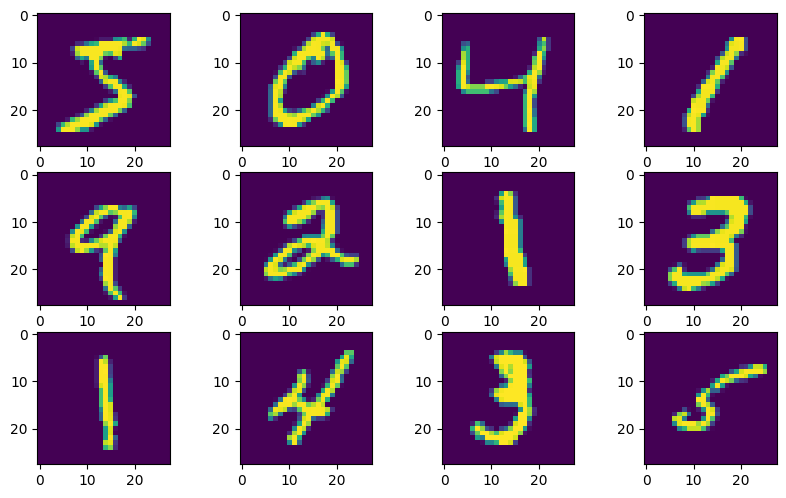

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])


In [5]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=x_train.shape[1:]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# normalization of values for faster convergence
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [7]:
num_category=10

model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_category,activation='softmax'))

c:\Users\marut\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
optmizer=tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',optimizer=optmizer,metrics=['accuracy'])

In [10]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Dropout name=dropout, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_1, built=True>]

In [11]:
batch_size=100
num_epochs=10
m1 = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8619 - loss: 0.4383 - val_accuracy: 0.9843 - val_loss: 0.0495
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9729 - loss: 0.0890 - val_accuracy: 0.9887 - val_loss: 0.0323
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - accuracy: 0.9810 - loss: 0.0611 - val_accuracy: 0.9881 - val_loss: 0.0333
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9901 - val_loss: 0.0290
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.9873 - loss: 0.0425 - val_accuracy: 0.9903 - val_loss: 0.0297
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9902 - val_loss: 0.0311
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9915 - val_loss: 0.0277
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.9909 - loss: 0.0291 - 

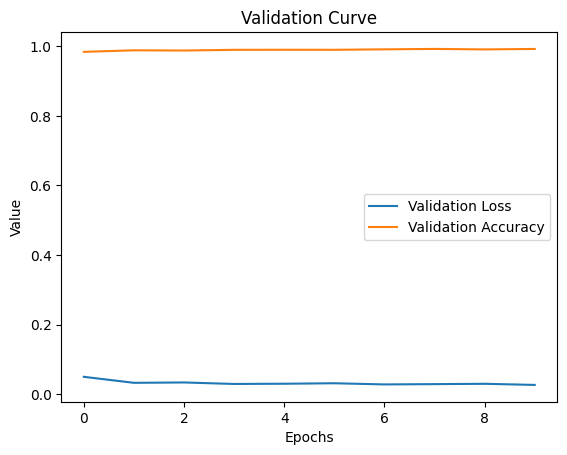

In [14]:
# Plotting the validation curve
plt.plot(m1.history['val_loss'], label='Validation Loss')
plt.plot(m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Curve')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

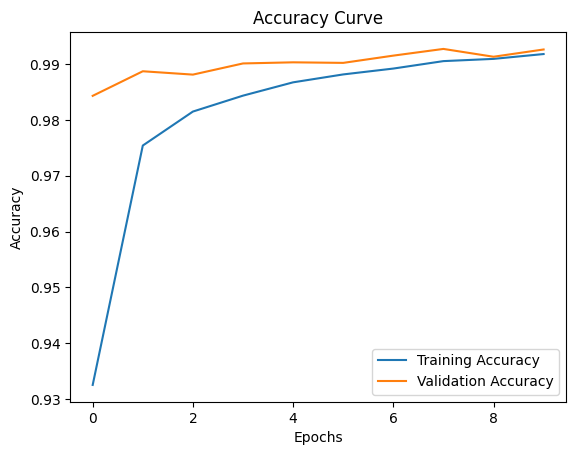

In [15]:
plt.plot(m1.history['accuracy'], label='Training Accuracy')
plt.plot(m1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()